# Exploratory Factor Analysis of LLM data

- statistical technique used to uncover the underlying structure of a set of observed variables
- reduce a large set of correlated variables into a smaller number of “latent factors” that explain most of the variance.

1. What EFA Does
- You have many observed variables (e.g., questionnaire items).
- You suspect there are fewer underlying factors causing the correlations among these variables.

EFA helps with:
- Identify these latent factors.
- Understand which variables load onto which factors.
- Reduce dimensionality if needed.

Data:

Goal:


In [20]:
# packages
import pandas as pd
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("processed_data/final_Dvs.csv")

In [21]:
# drop model column
numeric_df = data.drop(columns=['model'])

# impute missing values with mean
df = numeric_df.fillna(numeric_df.mean())

# scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [22]:
# check if data is suitable 
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)

print("KMO:", kmo_model)
print("Bartlett test p-value:", p_value)

KMO: 0.39819455253429825
Bartlett test p-value: 1.133395731832065e-53


/opt/miniconda3/envs/projectenv/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [23]:
# fit factor model, even though KMO so bad that not recommended
fa = FactorAnalyzer(n_factors=5, rotation='varimax')  # example: 5 factors
fa.fit(data_scaled)

# Factor loadings
loadings = pd.DataFrame(fa.loadings_, index=df.columns)
print(loadings)


                      0         1         2         3         4
AUDIT          0.768951 -0.121322 -0.013682 -0.111255  0.045818
BISa           0.404394  0.616487  0.247960  0.328111 -0.115112
BISm           0.502752  0.505390  0.213748  0.308518 -0.015892
BISn          -0.018230  0.672710  0.411329  0.229818 -0.391925
CAREa         -0.012544  0.033916 -0.196262  0.010889  0.199561
CAREs          0.315530 -0.299924  0.106170 -0.381444  0.471323
CAREw          0.159511 -0.405933  0.056009 -0.356006  0.524223
DAST          -0.158759 -0.175747  0.253401 -0.030451  0.045655
DM             0.094510  0.836946  0.116625  0.073225 -0.111197
Deth           0.822308  0.157765  0.163984 -0.024828  0.047716
Dgam           0.861274 -0.073980  0.187630  0.014693  0.045401
Dhea           0.701182 -0.164326 -0.132587 -0.059834  0.110238
Dinv           0.861765  0.038392  0.048736  0.031571 -0.012854
Drec           0.778853  0.161766 -0.282495 -0.043163  0.117394
Dsoc           0.166603  0.090615 -0.420

/opt/miniconda3/envs/projectenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:
# check variance explained
variance = fa.get_factor_variance()
print("Variance explained by each factor:\n", variance)


Variance explained by each factor:
 (array([5.29204764, 4.22506473, 3.59016226, 3.3681582 , 2.80858525]), array([0.14302831, 0.11419094, 0.09703141, 0.0910313 , 0.07590771]), array([0.14302831, 0.25721925, 0.35425067, 0.44528197, 0.52118968]))


/opt/miniconda3/envs/projectenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


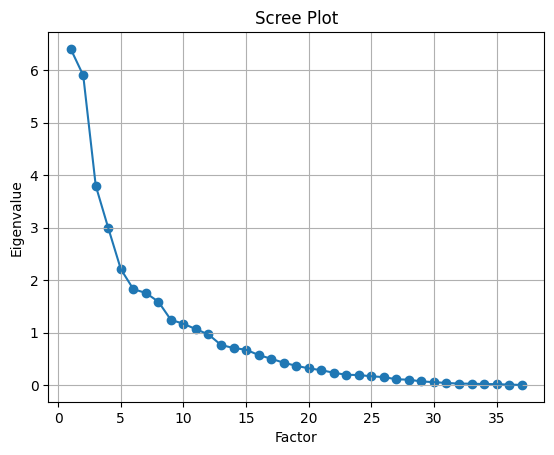

In [25]:
# Scree plot (Ellenboden) to determin number of factors
fa_all = FactorAnalyzer(rotation=None)
fa_all.fit(data_scaled)
ev, v = fa_all.get_eigenvalues()

plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
